In [1]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import seaborn as sns
import matplotlib.pyplot as plt
import ISLP
%matplotlib inline

In [2]:
Auto=load_data('Auto')

NameError: name 'load_data' is not defined

In [ ]:
from ISLP import load_data

In [ ]:
Auto.head()

In [ ]:
#For scikit use lm=LinearRegression, results=lm.fit(x,y), then results.predict(x_test)
#For StatModel use model=sm.OLS(y,x), then results=model.fit(), then you can summarize. note get your train const and test constant

In [8]:
Auto.info()

<class 'pandas.core.frame.DataFrame'>
Index: 392 entries, chevrolet chevelle malibu to chevy s-10
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           392 non-null    float64
 1   cylinders     392 non-null    int64  
 2   displacement  392 non-null    float64
 3   horsepower    392 non-null    int64  
 4   weight        392 non-null    int64  
 5   acceleration  392 non-null    float64
 6   year          392 non-null    int64  
 7   origin        392 non-null    int64  
dtypes: float64(3), int64(5)
memory usage: 27.6+ KB


In [10]:
Auto.shape

(392, 8)

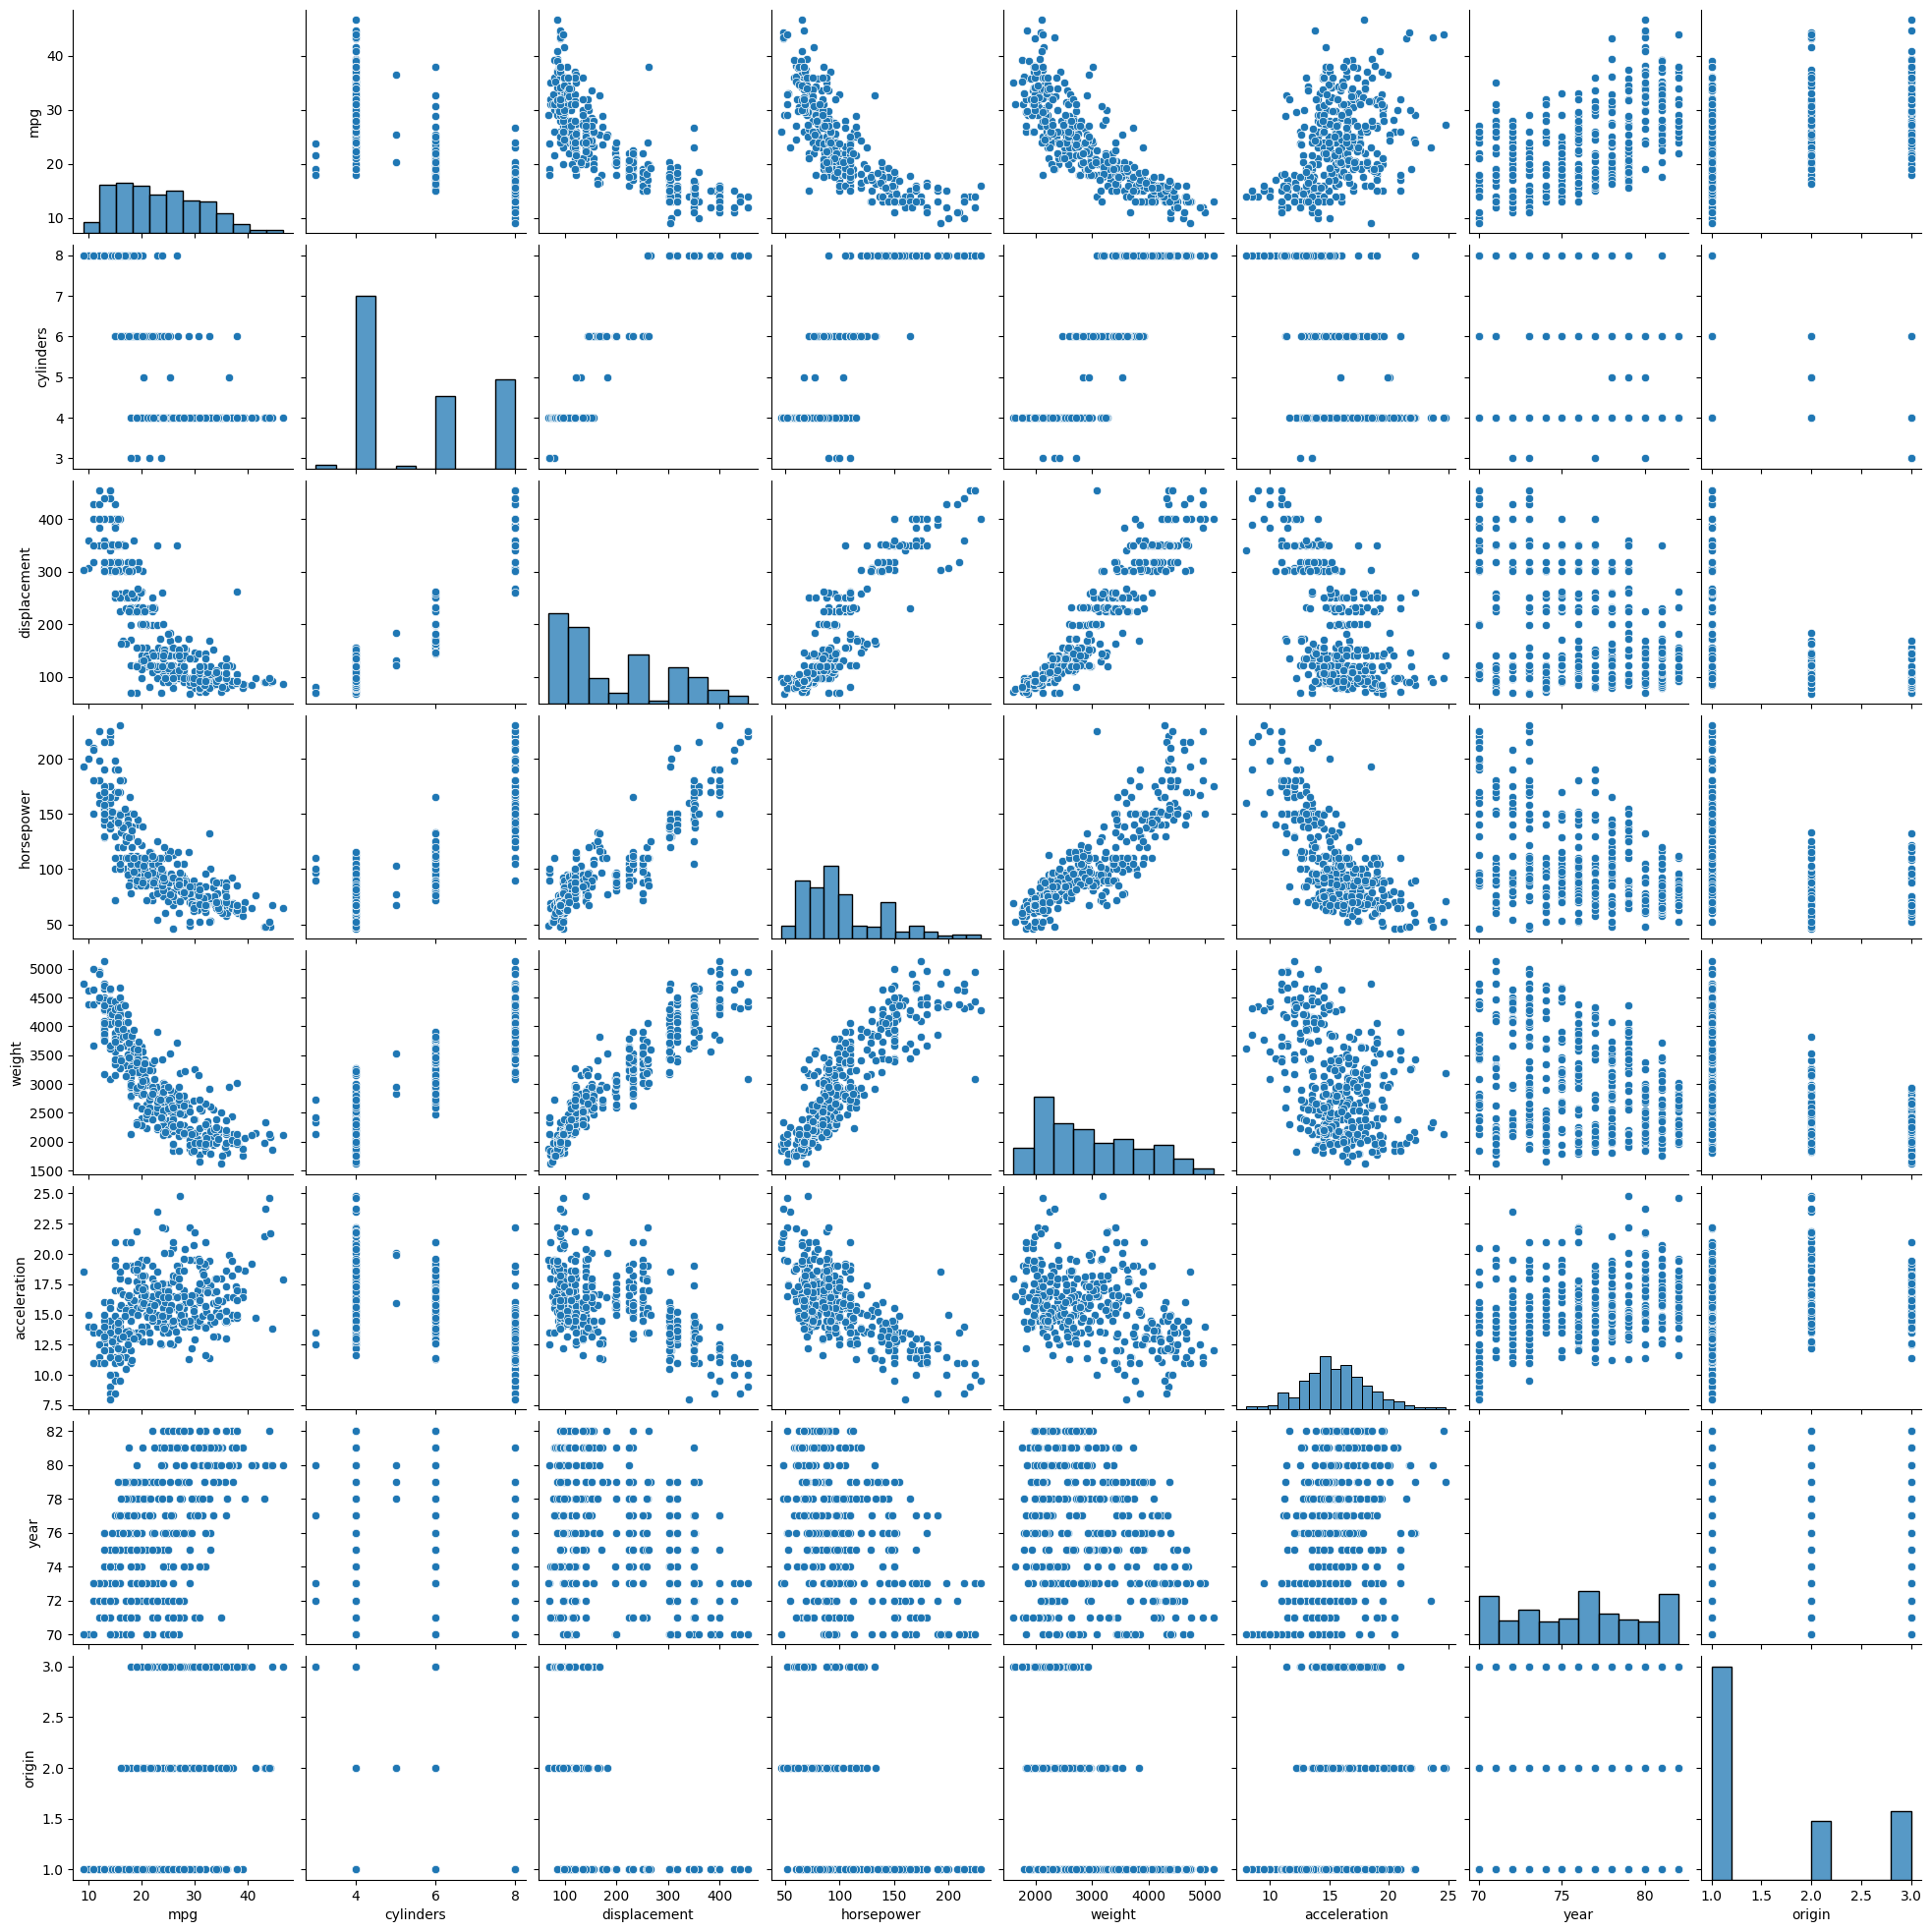

In [11]:
sns.pairplot(data=Auto)

In [12]:
Auto.columns

Index(['mpg', 'cylinders', 'displacement', 'horsepower', 'weight',
       'acceleration', 'year', 'origin'],
      dtype='object')

In [13]:
x=Auto[['mpg', 'cylinders', 'horsepower', 'weight',
       'acceleration', 'year', 'origin']]

In [14]:
y=Auto['displacement']

In [17]:
from sklearn.model_selection import train_test_split

In [18]:
 x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=42)

In [20]:
from sklearn.linear_model import LinearRegression

In [21]:
lm=LinearRegression()

In [50]:
results=lm.fit(x_train,y_train)

In [51]:
lm.intercept_

-33.554615067298954

In [52]:
lm.coef_

array([  0.63099619,  30.41018885,   0.46923556,   0.03695619,
        -1.16072073,  -0.96675723, -12.39794835])

In [31]:
coef_table=pd.DataFrame(lm.coef_,x.columns,columns=['Coefficients'])

In [32]:
coef_table

Coefficients
mpg               0.630996
cylinders        30.410189
horsepower        0.469236
weight            0.036956
acceleration     -1.160721
year             -0.966757
origin          -12.397948

In [33]:
Auto['cylinders'].nunique()

5

In [75]:
prediction= lm.predict(x_test)

In [76]:
prediction

array([102.47100034, 140.54401725,  73.90364594, 104.75539157,
       138.80577602,  90.88407155, 378.1276004 ,  90.63120534,
       222.62154988,  80.37154674, 360.69083895, 191.19595165,
       348.18471543,  93.53741228, 229.01523937, 128.89546553,
       217.65204042,  95.56883704, 135.40472268, 124.19084848,
       214.00056778,  86.34318291,  80.79644948, 317.58033025,
        94.14871802, 117.06866199, 135.21656718, 236.33563917,
        78.39713404, 115.13155716, 350.16163976, 214.23899981,
       307.54094561, 103.38623712, 356.38772963,  81.95875955,
       353.14710684, 118.23202452, 341.73669632, 391.15426705,
       332.12236928, 101.99925743,  96.86967028, 112.92526538,
       359.53820349, 398.06388872, 230.66068873, 104.48391993,
       118.24854804,  96.06397484, 347.16244746, 107.20208673,
       132.62516099,  98.62171024, 211.37897444, 240.01228779,
       292.42414287, 212.66405793, 123.42785455, 108.69311184,
       410.10778481, 213.04479061, 215.8159464 , 136.13

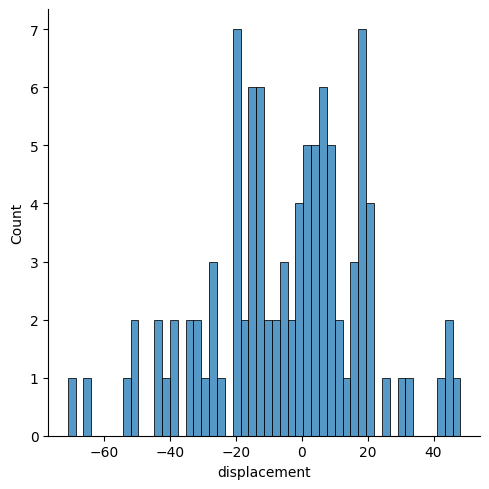

In [77]:
sns.displot((y_test-prediction), bins=50)

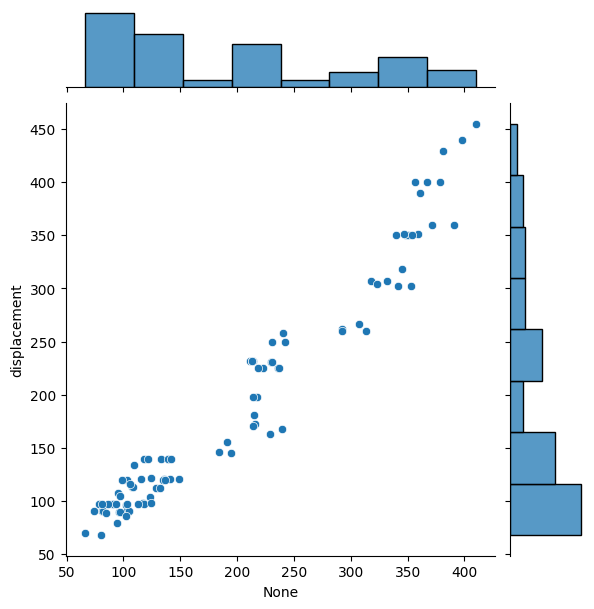

In [78]:
sns.jointplot(y=y_test,x=prediction, kind='scatter')

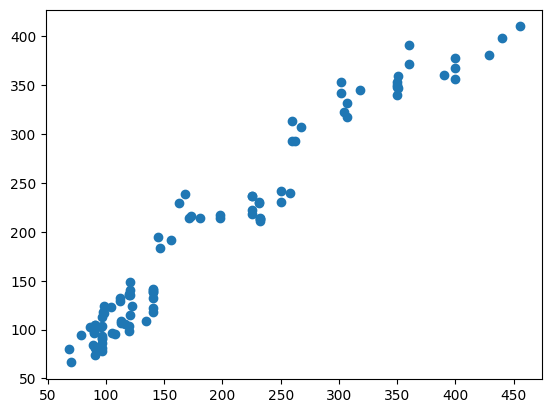

In [44]:
plt.scatter(y_test,prediction)

In [61]:
x_train

mpg  cylinders  horsepower  weight  acceleration  \
name                                                                        
toyota corona           27.5          4          95    2560          14.2   
amc hornet              18.0          6          97    2774          15.5   
mercury marquis         11.0          8         208    4633          11.0   
buick century           17.0          6         110    3907          21.0   
plymouth fury iii       14.0          8         215    4312           8.5   
...                      ...        ...         ...     ...           ...   
amc matador (sw)        15.0          8         150    3892          12.5   
amc gremlin             18.0          6         100    2789          15.0   
oldsmobile starfire sx  23.8          4          85    2855          17.6   
ford escort 2h          29.9          4          65    2380          20.7   
chevrolet impala        11.0          8         150    4997          14.0   

                        year  origin  
name                                  
toyota corona             78       3  
amc hornet                70       1  
mercury marquis           72       1  
buick century             75       1  
plymouth fury iii         70       1  
...                      ...     ...  
amc matador (sw)          72       1  
amc gremlin               73       1  
oldsmobile starfire sx    78       1  
ford escort 2h            81       1  
chevrolet impala          73       1  

[294 rows x 7 columns]

In [69]:
summarize(results)

coef  std err       t  P>|t|
mpg            0.6971    0.374   1.864  0.063
cylinders     30.1195    1.803  16.704  0.000
horsepower     0.4299    0.091   4.714  0.000
weight         0.0383    0.005   8.035  0.000
acceleration  -1.4534    0.656  -2.214  0.028
year          -1.3374    0.272  -4.925  0.000
origin       -12.7291    2.027  -6.280  0.000

In [62]:
from statsmodels.stats.outliers_influence \
import variance_inflation_factor as VIF
from statsmodels.stats.anova import anova_lm
from ISLP.models import (ModelSpec as MS,
summarize,
poly)

In [96]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           displacement   R-squared:                       0.957
Model:                            OLS   Adj. R-squared:                  0.956
Method:                 Least Squares   F-statistic:                     908.0
Date:                Fri, 23 May 2025   Prob (F-statistic):          3.19e-191
Time:                        13:23:35   Log-Likelihood:                -1321.6
No. Observations:                 294   AIC:                             2659.
Df Residuals:                     286   BIC:                             2689.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const          -33.5546     37.068     -0.905      0.366    -106.515      39.406
mpg              0.6310      0.381      1.655      0.099      -0.119       1.381
cylinders       30.4102      1.832     16.599      0.000      26.804      34.016
horsepower       0.4692      0.101      4.643      0.000       0.270       0.668
weight           0.0370      0.005      7.422      0.000       0.027       0.047
acceleration    -1.1607      0.732     -1.586      0.114      -2.601       0.280
year            -0.9668      0.491     -1.968      0.050      -1.934       0.000
origin         -12.3979      2.060     -6.018      0.000     -16.453      -8.343
==============================================================================
Omnibus:                       27.028   Durbin-Watson:                   2.044
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               89.155
Skew:                           0.293   Prob(JB):                     4.37e-20
Kurtosis:                       5.633   Cond. No.                     8.94e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 8.94e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [85]:
x_train_const=sm.add_constant(x_train)

In [86]:
model=sm.OLS(y_train,x_train_const)

In [89]:
results=model.fit()

In [90]:
x_test_const=sm.add_constant(x_test)

In [91]:
predictions=results.predict(x_test_const)

In [92]:
predictions

name
renault 12 (sw)               102.471000
saab 99gle                    140.544017
honda civic cvcc               73.903646
plymouth cricket              104.755392
ford mustang gl               138.805776
                                 ...    
pontiac j2000 se hatchback    132.218512
pontiac phoenix lj            230.840654
mercedes-benz 280s            239.145379
volvo 145e (sw)               149.158087
plymouth custom suburb        371.633396
Length: 98, dtype: float64

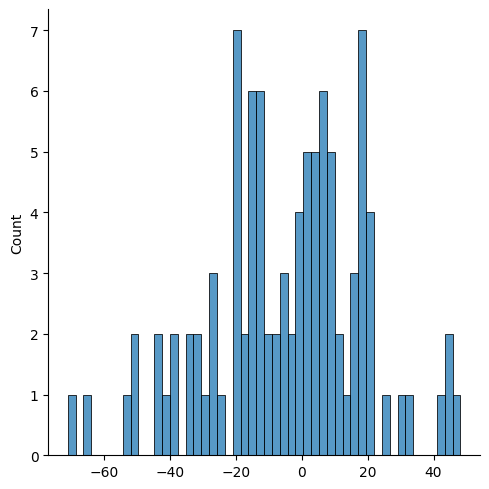

In [93]:
sns.displot((y_test-predictions), bins=50)

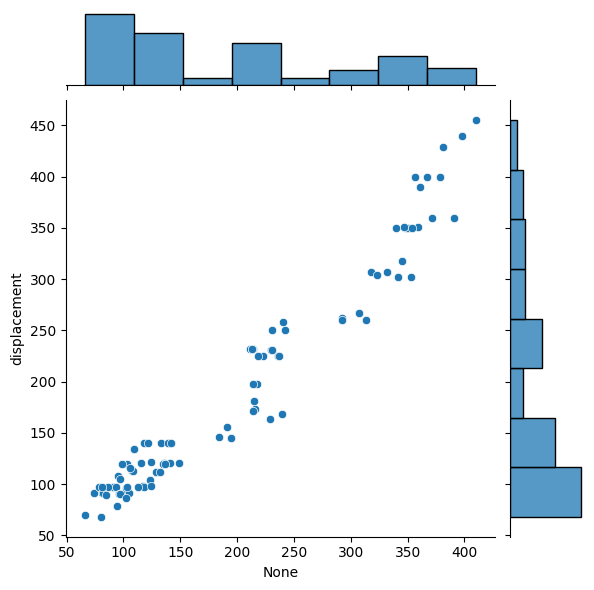

In [94]:
sns.jointplot(y=y_test,x=predictions, kind='scatter')

In [81]:
predictions.head()

name
renault 12 (sw)     104.121103
saab 99gle          139.337586
honda civic cvcc     73.978190
plymouth cricket    106.029234
ford mustang gl     137.968687
dtype: float64

In [83]:
prediction

array([102.47100034, 140.54401725,  73.90364594, 104.75539157,
       138.80577602,  90.88407155, 378.1276004 ,  90.63120534,
       222.62154988,  80.37154674, 360.69083895, 191.19595165,
       348.18471543,  93.53741228, 229.01523937, 128.89546553,
       217.65204042,  95.56883704, 135.40472268, 124.19084848,
       214.00056778,  86.34318291,  80.79644948, 317.58033025,
        94.14871802, 117.06866199, 135.21656718, 236.33563917,
        78.39713404, 115.13155716, 350.16163976, 214.23899981,
       307.54094561, 103.38623712, 356.38772963,  81.95875955,
       353.14710684, 118.23202452, 341.73669632, 391.15426705,
       332.12236928, 101.99925743,  96.86967028, 112.92526538,
       359.53820349, 398.06388872, 230.66068873, 104.48391993,
       118.24854804,  96.06397484, 347.16244746, 107.20208673,
       132.62516099,  98.62171024, 211.37897444, 240.01228779,
       292.42414287, 212.66405793, 123.42785455, 108.69311184,
       410.10778481, 213.04479061, 215.8159464 , 136.13

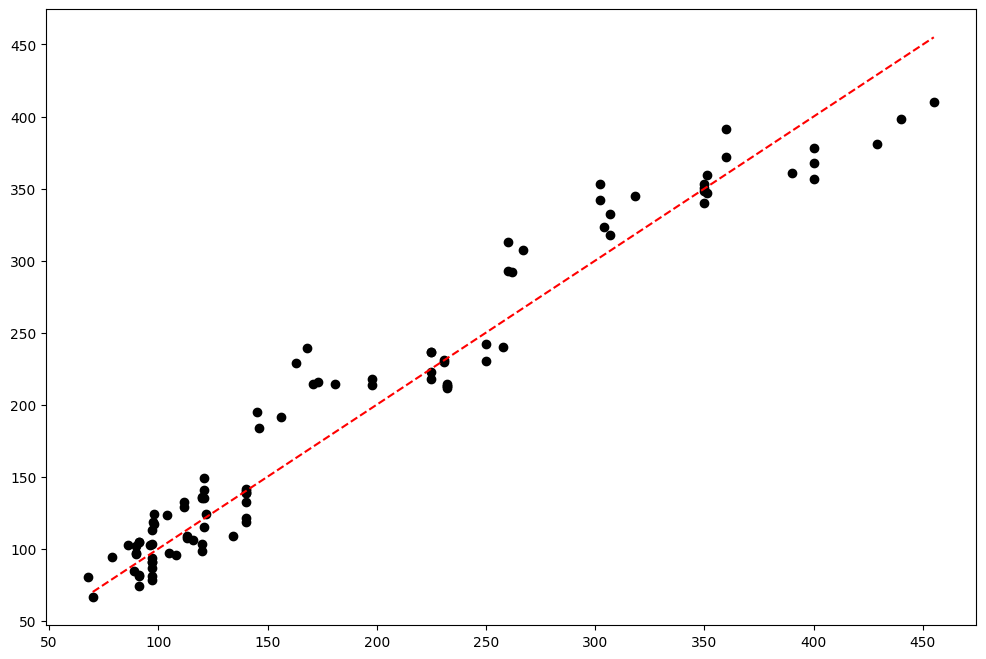

In [100]:
#For scikit
plt.figure(figsize=(12,8))
plt.scatter(y_test,prediction,color='black',label='P vs A')
plt.plot([y_train.min(),y_train.max()], [y_train.min(),y_train.max()],'r--', label='Ideal Line')

In [101]:
sns.lmplot(data=Auto,x=)

SyntaxError: invalid syntax (3229157912.py, line 1)

In [103]:
residuals=y_test-prediction

C:\Users\tegae\AppData\Local\Temp\ipykernel_21172\3292035541.py:3: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  plt.axhline(y[0],color='red',linestyle='--')


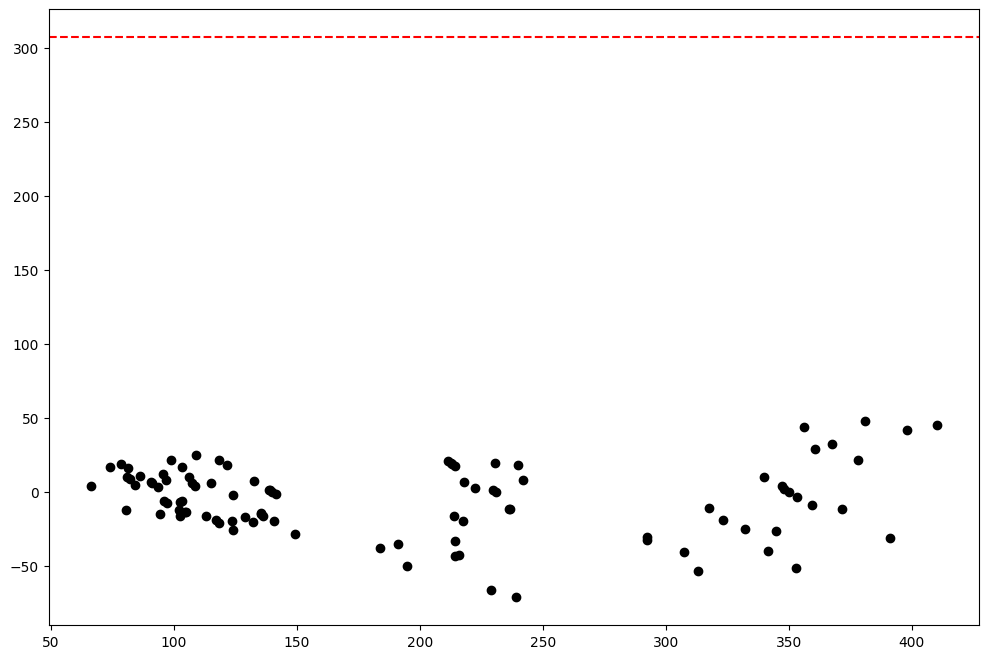

In [107]:
plt.figure(figsize=(12,8))
plt.scatter(predictions,residuals,color='black')
plt.axhline(y[0],color='red',linestyle='--')